In [1]:
'''
Problem Statements: 3.	Build a Decision Tree & Random Forest model on the fraud data. Treat those who have taxable_income <= 30000 as
Risky and others as Good (discretize the taxable income column).

1.1.	What is the business objective?
The task is to build Decision Tree and Random Forest models using fraud detection data, with the taxable_income column discretized into two categories
Risky: Individuals with taxable_income ≤ 30,000.
Good: Individuals with taxable_income > 30,000.

1.2 	Are there any constraints?
If the "Risky" category is underrepresented, it could lead to biased model predictions.
Missing or noisy data in the dataset may reduce model accuracy.
Decision Trees can easily overfit the training data, impacting performance on unseen test data.
'''

'\nProblem Statements: 3.\tBuild a Decision Tree & Random Forest model on the fraud data. Treat those who have taxable_income <= 30000 as\nRisky and others as Good (discretize the taxable income column).\n\n1.1.\tWhat is the business objective?\nThe task is to build Decision Tree and Random Forest models using fraud detection data, with the taxable_income column discretized into two categories\nRisky: Individuals with taxable_income ≤ 30,000.\nGood: Individuals with taxable_income > 30,000.\n\n1.2 \tAre there any constraints?\nIf the "Risky" category is underrepresented, it could lead to biased model predictions.\nMissing or noisy data in the dataset may reduce model accuracy.\nDecision Trees can easily overfit the training data, impacting performance on unseen test data.\n'

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('Fraud_check.csv')

In [4]:
#Preprocessing and EDA

In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [9]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [10]:
#from above all obesrvation data look balanced and no need of any change till now

In [11]:
# Preprocess the data
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [12]:
# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

In [15]:
# Split the data into features and target variable
X = data.drop('Taxable.Income_Risky', axis=1)
y = data['Taxable.Income_Risky']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Build the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Predict the target variable for the test set
y_pred_dt = dt_model.predict(X_test)

In [19]:
# Evaluate the Decision Tree model
print("Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Model Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       143
           1       0.20      0.24      0.22        37

    accuracy                           0.65       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.67      0.65      0.66       180

Confusion Matrix:
 [[108  35]
 [ 28   9]]


In [20]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Predict the target variable for the test set
y_pred_rf = rf_model.predict(X_test)

In [22]:
# Evaluate the Random Forest model
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.7277777777777777
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.84       143
           1       0.00      0.00      0.00        37

    accuracy                           0.73       180
   macro avg       0.39      0.46      0.42       180
weighted avg       0.62      0.73      0.67       180

Confusion Matrix:
 [[131  12]
 [ 37   0]]


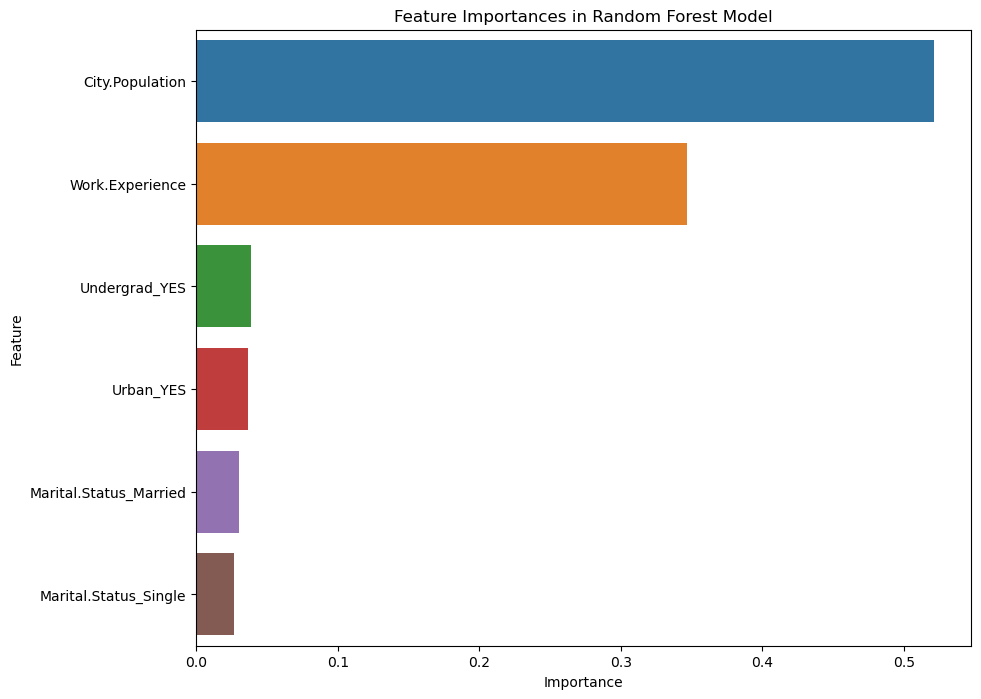

In [23]:
# Plot feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [ ]:
'''CONCLUSION '''
#Thus the result shows that
#City pupulation and WrokExperience shi=ows the major effect and fromm this we can identify Fraud people rekated to incom tax

In [ ]:
#6.	Write about the benefits/impact of the solution - in what way does the business (client) benefit from the solution provided?
'''
1.Effective Risk ManagemenT.
2.Reduces losses by minimizing exposure to high-risk individuals or fraudulent cases.
3.Improved Decision-Making
4.Random Forest's ability to handle complex datasets ensures the identification of subtle patterns that may indicate fraudulent activity.
'''